<a href="https://colab.research.google.com/github/Dernibes/SpeakerRecognitionGroupProject/blob/main/RecordTrainingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [ ]:
import os
from os.path import exists
# from google.colab import drive
# drive.mount('/content/drive/')

# !pwd
# %cd drive/MyDrive/GroupProject
# !pwd
if not exists('Training'):
  !git clone -q --depth 1 https://github.com/Dernibes/SpeakerRecognitionGroupProject.git
  %cd SpeakerRecognitionGroupProject/TrainingDataGen
!pwd

/content/SpeakerRecognitionGroupProject/TrainingDataGen
/content/SpeakerRecognitionGroupProject/TrainingDataGen


In [ ]:
!pip install -q omegaconf torchaudio pydub

     |████████████████████████████████| 74 kB 3.0 MB/s 
     |████████████████████████████████| 112 kB 48.8 MB/s 
     |████████████████████████████████| 596 kB 49.0 MB/s 


In [ ]:
import pathlib
from pathlib import Path

from src.silero.utils import (init_jit_model, 
                       split_into_batches,
                       read_audio,
                       read_batch,
                       prepare_model_input)

from colab_utils import (record_audio,
                         audio_bytes_to_np,
                         upload_audio)

# imports for uploading/recording
import numpy as np
import ipywidgets as widgets
from scipy.io import wavfile
from IPython.display import Audio, display, clear_output
from torchaudio.functional import vad

# import for visualising waveforms
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
from IPython import display
from IPython.display import Audio, display, clear_output


# Recording Script

## Duration: 3 seconds
## Word: Hello
## No. of recordings: 20

In [ ]:
#@markdown Either record audio from microphone or upload audio from file (.mp3 or .wav) { run: "auto" }

record_or_upload = "Record" #@param ["Record", "Upload (.mp3 or .wav)"]
record_seconds =   3#@param {type:"number", min:1, max:10, step:1}
sample_rate = 16000
number_to_record =  9#@param {type:"number", min:1,max:10,step:1}
speaker='Adam'#@param ["Xixian", "Adam", "Ibrahim", "Riccardo", "Seb"]
word='Yes'#@param ["Dog", "Cat", "Train", "Hello", "Yes"]



def _record_audio(b):
  clear_output()
  for i in range(number_to_record):
    audio = record_audio(record_seconds)
    id=1
    while True:
      name=speaker+'_'+word+'_'+str(id)
      if os.path.isfile(("Training/"+speaker+"/"+name+".wav")):
        id=id+1
      else:
        wavfile.write("Training/"+speaker+"/"+name+".wav", sample_rate, (32767*audio).numpy().astype(np.int16))
        break
    
    display(Audio(audio, rate=sample_rate, autoplay=True))

if record_or_upload == "Record":
  button = widgets.Button(description="Record Speech")
  button.on_click(_record_audio)
  display(button)
else:
  audio = _upload_audio("")

Button(description='Record Speech', style=ButtonStyle())

In [ ]:
name=speaker+'_'+word+'_'+str(id)
print(os.path.isfile("Training/"+speaker+"/"+name+".wav"))

False


# Downloading Group Data

## Seb

In [ ]:
# zipping Files
!zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Seb.zip /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Seb

# Saving them
from google.colab import files
files.download("/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Seb.zip")

## Adam

In [ ]:
# zipping Files
!zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Adam.zip /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Adam

# Saving them
from google.colab import files
files.download("/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Adam.zip")

	zip warning: name not matched: /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Adam

zip error: Nothing to do! (try: zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Adam.zip . -i /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Adam)


FileNotFoundError: ignored

## Ibrahim

In [ ]:
# zipping Files
!zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim.zip /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim

# Saving them
from google.colab import files
files.download("/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim.zip")

  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/ (stored 0%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_18.wav (deflated 36%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_19.wav (deflated 35%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_5.wav (deflated 34%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_13.wav (deflated 38%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_20.wav (deflated 34%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_10.wav (deflated 43%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_3.wav (deflated 38%)
  adding: content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Xixian

In [ ]:
# zipping Files
!zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian.zip /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian

# Saving them
from google.colab import files
files.download("/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian.zip")

	zip warning: name not matched: /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian

zip error: Nothing to do! (try: zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian.zip . -i /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian)


FileNotFoundError: ignored

## Riccardo

In [ ]:
# zipping Files
!zip -r /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Riccardo.zip /content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Riccardo

# Saving them
from google.colab import files
files.download("/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Riccardo.zip")

# Plotting Waveforms

In [ ]:
dir = "/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training"
names = ["Xixian", "Adam", "Ibrahim", "Riccardo", "Seb"]
"""

# Removing unwanted files
hmm_files = tf.io.gfile.glob(dir+ "/*/hmm")
for f in hmm_files:
    try:
      os.remove(f)
    except OSError as e:
        print("Error: %s : %s" % (f, e.strerror))

"""

# Storing waveforms paths under filenames
filenames = tf.io.gfile.glob(dir + '/*/*')

filenames = tf.random.shuffle(filenames)

num_samples = len(filenames)
print("num_samples: ", num_samples)
for i in filenames:
  print(i)

num_samples:  29
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_3.wav', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Xixian/Xixian_hello.zip', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Riccardo/Hello', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_10.wav', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_6.wav', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_16.wav', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Ibrahim/Ibrahim_Hello_15.wav', shape=(), dtype=string)
tf.Tensor(b'/content/SpeakerRecognitionGroupProject/TrainingDataGen/Training/Seb

InvalidArgumentError: ignored

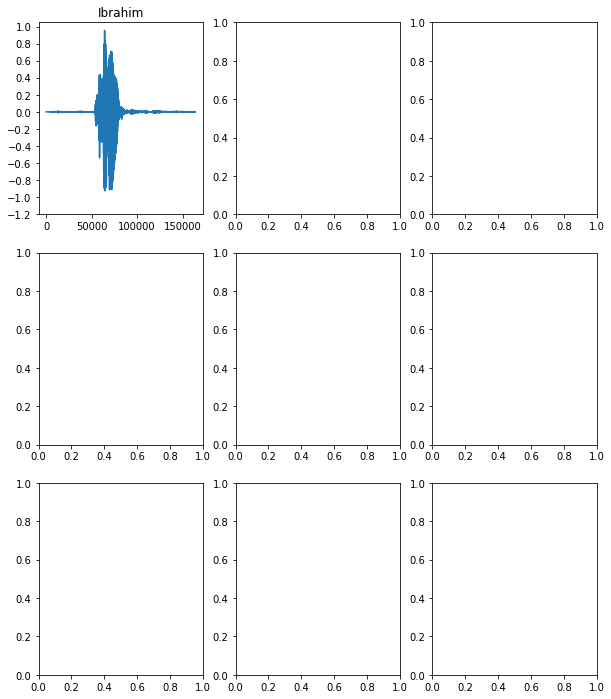

In [ ]:
def decode_audio(audio_binary):
  # Decode WAV-encoded audio files to `float32` tensors, normalized
  # to the [-1.0, 1.0] range. Return `float32` audio and a sample rate.
  audio, _ = tf.audio.decode_wav(contents=audio_binary)
  # Since all the data is single channel (mono), drop the `channels`
  # axis from the array.
  return tf.squeeze(audio, axis=-1)

def get_label(file_path):
  parts = tf.strings.split(
      input=file_path,
      sep=os.path.sep)
  # Note: You'll use indexing here instead of tuple unpacking to enable this
  # to work in a TensorFlow graph.
  return parts[-2]

def get_waveform_and_label(file_path):
  label = get_label(file_path)
  audio_binary = tf.io.read_file(file_path)
  waveform = decode_audio(audio_binary)
  return waveform, label

AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(filenames)

waveform_ds = files_ds.map(
    map_func=get_waveform_and_label,
    num_parallel_calls=AUTOTUNE)

# Plotting some waveforms
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.plot(audio.numpy())
  ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
  label = label.numpy().decode('utf-8')
  ax.set_title(label)

plt.show()

# Playing Audio

In [ ]:
def get_spectrogram(waveform):
  # Zero-padding for an audio waveform with less than 16,000 samples.
  input_len = 16000
  waveform = waveform[:input_len]
  zero_padding = tf.zeros(
      [16000] - tf.shape(waveform),
      dtype=tf.float32)
  # Cast the waveform tensors' dtype to float32.
  waveform = tf.cast(waveform, dtype=tf.float32)
  # Concatenate the waveform with `zero_padding`, which ensures all audio
  # clips are of the same length.
  equal_length = tf.concat([waveform, zero_padding], 0)
  # Convert the waveform to a spectrogram via a STFT.
  spectrogram = tf.signal.stft(
      equal_length, frame_length=255, frame_step=128)
  # Obtain the magnitude of the STFT.
  spectrogram = tf.abs(spectrogram)
  # Add a `channels` dimension, so that the spectrogram can be used
  # as image-like input data with convolution layers (which expect
  # shape (`batch_size`, `height`, `width`, `channels`).
  spectrogram = spectrogram[..., tf.newaxis]
  return spectrogram

for waveform, label in waveform_ds:
  label = label.numpy().decode('utf-8')
  spectrogram = get_spectrogram(waveform)
  print('Label:', label)
  print('Waveform shape:', waveform.shape)
  print('Spectrogram shape:', spectrogram.shape)
  print('Audio playback')
  display(Audio(waveform, rate=16000))

Label: Ibrahim
Waveform shape: (163840,)
Spectrogram shape: (124, 129, 1)
Audio playback


InvalidArgumentError: ignored